In [2]:
#Importing necessary libabrires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# supress some warnings that mess up my slides
import warnings; warnings.simplefilter('ignore')

In [3]:
#Openeing the reqired file
df = pd.read_csv("Epinions_cleaned_data_portfolio_2.csv")
df.info()
df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userId       2899 non-null   int64 
 1   timestamp    2899 non-null   int64 
 2   review       2899 non-null   object
 3   item         2899 non-null   object
 4   rating       2899 non-null   int64 
 5   helpfulness  2899 non-null   int64 
 6   gender       2899 non-null   object
 7   category     2899 non-null   object
dtypes: int64(4), object(4)
memory usage: 181.3+ KB


,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4,4,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,5,4,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5,4,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,5,3,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2,4,F,Movies


In [4]:
#converting "userId" column into categorical 
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["userId_code"] = ord_enc.fit_transform(df[["userId"]])
df[["userId", "userId_code"]].head()

,userId,userId_code
0,4259,96.0
1,4259,96.0
2,4259,96.0
3,4259,96.0
4,4259,96.0


In [5]:
#converting "review" column into categorical 
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["review_code"] = ord_enc.fit_transform(df[["review"]])
df[["review", "review_code"]].head()

,review,review_code
0,"Finally, Something for (Relatively) Nothing",856.0
1,Shocking!,1985.0
2,Simply Shaggadelic!,2006.0
3,Better Than The First!,472.0
4,Blair Witch made me appreciate this,493.0


In [6]:
#converting "category" column into categorical 
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["category_code"] = ord_enc.fit_transform(df[["category"]])
df[["category", "category_code"]].head()

,category,category_code
0,Online Stores & Services,6.0
1,Movies,5.0
2,Movies,5.0
3,Movies,5.0
4,Movies,5.0


In [7]:
#converting "gender" column into categorical 
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["gender_code"] = ord_enc.fit_transform(df[["gender"]])
df[["gender", "gender_code"]].head()

,gender,gender_code
0,F,0.0
1,F,0.0
2,F,0.0
3,F,0.0
4,F,0.0


In [8]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userId         2899 non-null   int64  
 1   timestamp      2899 non-null   int64  
 2   review         2899 non-null   object 
 3   item           2899 non-null   object 
 4   rating         2899 non-null   int64  
 5   helpfulness    2899 non-null   int64  
 6   gender         2899 non-null   object 
 7   category       2899 non-null   object 
 8   userId_code    2899 non-null   float64
 9   review_code    2899 non-null   float64
 10  category_code  2899 non-null   float64
 11  gender_code    2899 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 271.9+ KB


In [9]:
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,userId_code,review_code,category_code,gender_code
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4,4,F,Online Stores & Services,96.0,856.0,6.0,0.0
1,4259,12000,Shocking!,Sixth Sense,5,4,F,Movies,96.0,1985.0,5.0,0.0
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5,4,F,Movies,96.0,2006.0,5.0,0.0
3,4259,12000,Better Than The First!,Toy Story 2,5,3,F,Movies,96.0,472.0,5.0,0.0
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2,4,F,Movies,96.0,493.0,5.0,0.0


In [10]:
df[['review_code', 'rating']].corr()

,review_code,rating
review_code,1.000000,-0.062071
rating,-0.062071,1.000000


In [11]:
df[['category_code', 'rating']].corr()

,category_code,rating
category_code,1.000000,-0.140576
rating,-0.140576,1.000000


In [12]:
df[['category_code', 'gender_code']].corr()

,category_code,gender_code
category_code,1.000000,-0.017644
gender_code,-0.017644,1.000000


In [13]:
df[['helpfulness', 'gender_code']].corr()

,helpfulness,gender_code
helpfulness,1.000000,-0.046627
gender_code,-0.046627,1.000000


In [14]:
df[['rating', 'gender_code']].corr()

,rating,gender_code
rating,1.000000,0.018105
gender_code,0.018105,1.000000


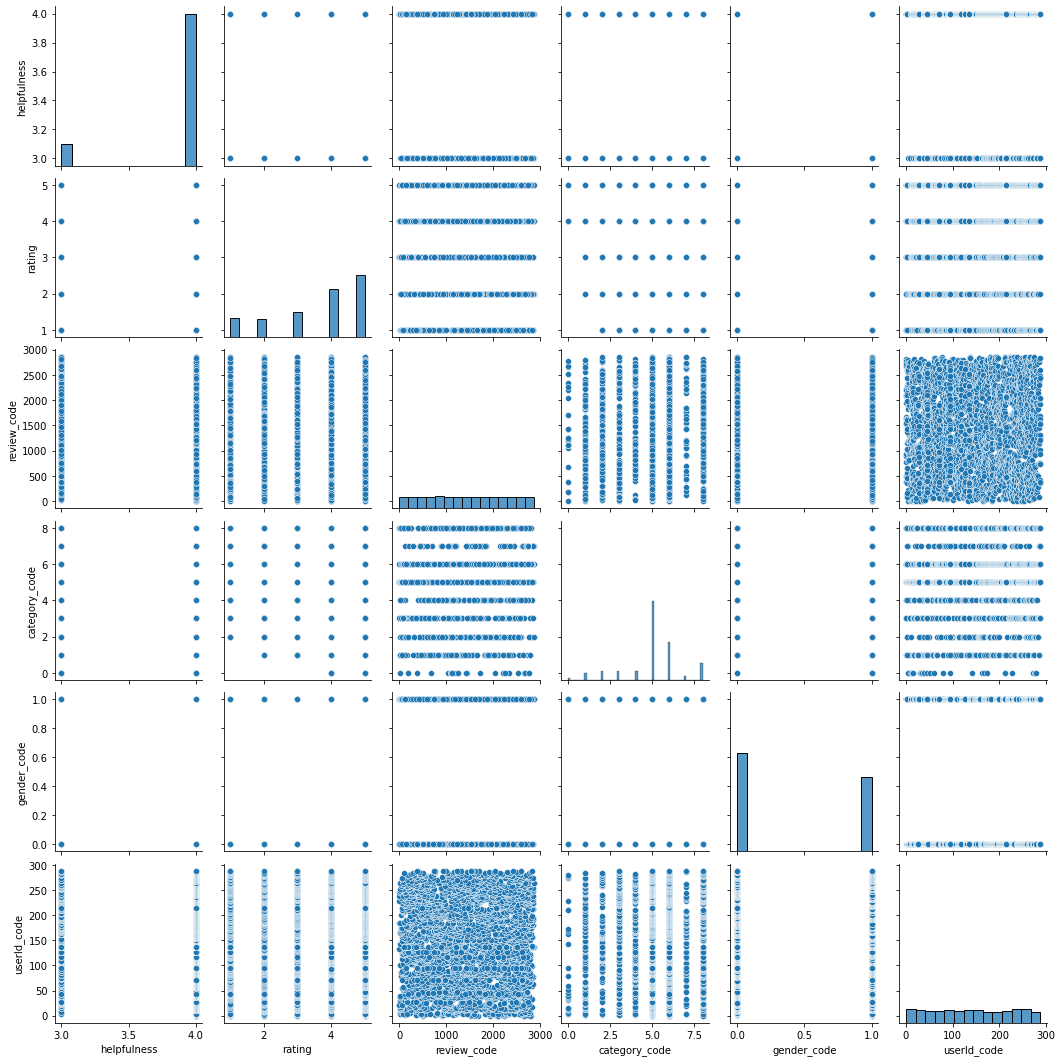

In [15]:
p = sns.pairplot(df[[ 'helpfulness', 'rating', 'review_code', 'category_code', 'gender_code', 'userId_code']])

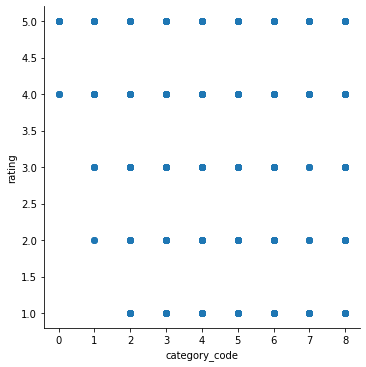

In [16]:
p = sns.lmplot( 'category_code', 'rating', df, height=5, fit_reg=False) #Plot data and regression model fits across a FacetGrid.

In [17]:
df[['category_code', 'rating']].corr()

,category_code,rating
category_code,1.000000,-0.140576
rating,-0.140576,1.000000


In [18]:
# create X and y
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
feature_cols = ['rating']
X = df[feature_cols]
y = df['category_code'] 

# import, instantiate, fit
from sklearn.linear_model import LinearRegression 
model = LinearRegression() #Ordinary least squares Linear Regression. 
reg=model.fit(X, y) #Fit linear model.
reg.score(X, y) #Return the coefficient of determination of the prediction.
                #The best possible score is 1.0 and it can be negative

0.01976171912036606

In [19]:
print("y = ", model.coef_, "* x + ", model.intercept_) 

y =  [-0.17420676] * x +  5.67750345688514


In [20]:
xmin = X.min()
ymin = model.coef_[0] * xmin + model.intercept_ #[0] means the value for the first feature
xmax = X.max()
ymax = model.coef_[0] * xmax + model.intercept_

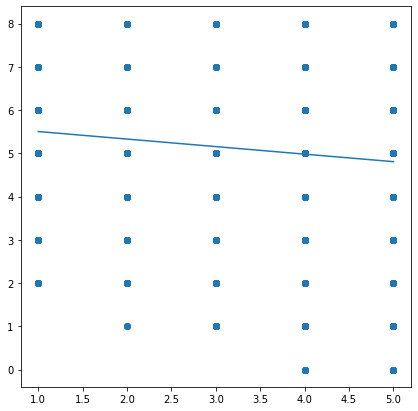

In [21]:
plt.figure(figsize=(7,7))
plt.plot([xmin, xmax], [ymin, ymax])  # single line
plt.scatter(X, y)  # original data 

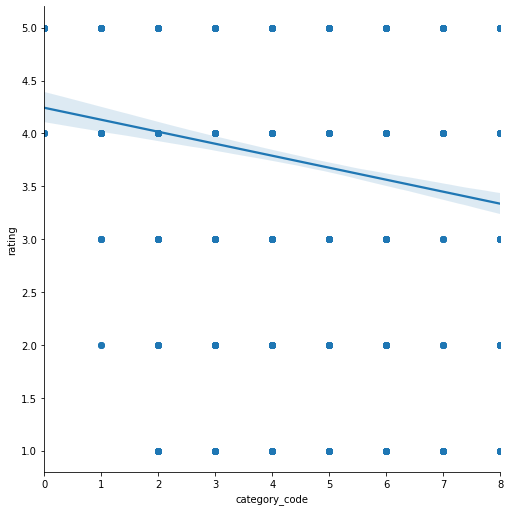

In [22]:
# Same thing with lmplot (linear model plot)
p = sns.lmplot('category_code','rating' , df, height=7)

In [23]:
print("Predicted value for x =", xmin[0], "is", model.predict([xmin]))
yhat = model.predict(X) #Predict using the linear model.
yhat

Predicted value for x = 1 is [5.5032967]


array([4.98067643, 4.80646967, 4.80646967, ..., 4.80646967, 5.15488318,
       5.15488318])

In [24]:
mse = ((y - model.predict(X))**2).mean() #y = birth['rating'] 
print(mse, np.sqrt(mse)) #mean squared error

2.723914858002314 1.650428689159975


In [25]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

MSE: 2.7239148580023285
R^2: 0.01976171912036606


In [26]:
# create X and y
feature_cols = ['rating']
X = df[feature_cols]
y = df['category_code']
 
model = LinearRegression()
reg2=model.fit(X, y)
reg2.score(X, y) #The best possible score is 1.0 and it can be negative

0.01976171912036606

In [27]:
print("y = ", model.coef_, "* X + ", model.intercept_)


y =  [-0.17420676] * X +  5.67750345688514


In [28]:
# Training data staring 10%
feature_cols = ['rating']
X = df[feature_cols]
y = df['category_code']

X_train = X[:289] 
print(X_train)
y_train = y[:289]
print(y_train)
X_test = X[289:]
print(X_test)
y_test = y[289:]
print(y_test)

     rating
0         4
1         5
2         5
3         5
4         2
..      ...
284       5
285       5
286       4
287       5
288       5

[289 rows x 1 columns]
0      6.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
284    2.0
285    2.0
286    2.0
287    2.0
288    2.0
Name: category_code, Length: 289, dtype: float64
      rating
289        2
290        4
291        4
292        3
293        5
...      ...
2894       5
2895       5
2896       5
2897       3
2898       3

[2610 rows x 1 columns]
289     5.0
290     5.0
291     5.0
292     5.0
293     5.0
       ... 
2894    5.0
2895    5.0
2896    5.0
2897    5.0
2898    5.0
Name: category_code, Length: 2610, dtype: float64


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 2.8111262858186388
R^2: -0.05005228810159967


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(2174, 1) (725, 1)


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 2.7437740576551066
R^2: 0.01548237594515467


In [32]:
# Training data staring 90%
feature_cols = ['rating']
X = df[feature_cols]
y = df['category_code']

X_train = X[:2610]
print(X_train)
y_train = y[:2610]
print(y_train)
X_test = X[2610:] 
print(X_test)
y_test = y[2610:]
print(y_test)

      rating
0          4
1          5
2          5
3          5
4          2
...      ...
2605       3
2606       5
2607       5
2608       4
2609       1

[2610 rows x 1 columns]
0       6.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
2605    5.0
2606    6.0
2607    5.0
2608    5.0
2609    7.0
Name: category_code, Length: 2610, dtype: float64
      rating
2610       5
2611       3
2612       5
2613       2
2614       4
...      ...
2894       5
2895       5
2896       5
2897       3
2898       3

[289 rows x 1 columns]
2610    8.0
2611    8.0
2612    8.0
2613    3.0
2614    8.0
       ... 
2894    5.0
2895    5.0
2896    5.0
2897    5.0
2898    5.0
Name: category_code, Length: 289, dtype: float64


In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 3.291229013771394
R^2: -0.002460645264250383


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #20% for test
print(X_train.shape, X_test.shape)

(2319, 1) (580, 1)


In [35]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 2.4921483285819863
R^2: 0.017533050045727028


In [36]:
# Training data staring 10% with most correlated features
feature_cols = ['gender_code','rating']
X = df[feature_cols]
y = df['category_code']

X_train = X[:289] 
print(X_train)
y_train = y[:289]
print(y_train)
X_test = X[289:]
print(X_test)
y_test = y[289:]
print(y_test)

     gender_code  rating
0            0.0       4
1            0.0       5
2            0.0       5
3            0.0       5
4            0.0       2
..           ...     ...
284          0.0       5
285          0.0       5
286          0.0       4
287          0.0       5
288          0.0       5

[289 rows x 2 columns]
0      6.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
284    2.0
285    2.0
286    2.0
287    2.0
288    2.0
Name: category_code, Length: 289, dtype: float64
      gender_code  rating
289           0.0       2
290           0.0       4
291           0.0       4
292           0.0       3
293           0.0       5
...           ...     ...
2894          0.0       5
2895          0.0       5
2896          0.0       5
2897          0.0       3
2898          0.0       3

[2610 rows x 2 columns]
289     5.0
290     5.0
291     5.0
292     5.0
293     5.0
       ... 
2894    5.0
2895    5.0
2896    5.0
2897    5.0
2898    5.0
Name: category_code, Length: 2610, dt

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 2.8153814845908434
R^2: -0.051641751097133204


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(2174, 2) (725, 2)


In [39]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 2.834760626976631
R^2: 0.008701314247494096


In [40]:
# Training data staring 90% most correlated features
feature_cols = ['gender_code','rating']
X = df[feature_cols]
y = df['category_code']

X_train = X[:2610]
print(X_train)
y_train = y[:2610]
print(y_train)
X_test = X[2610:] 
print(X_test)
y_test = y[2610:]
print(y_test)

      gender_code  rating
0             0.0       4
1             0.0       5
2             0.0       5
3             0.0       5
4             0.0       2
...           ...     ...
2605          0.0       3
2606          0.0       5
2607          0.0       5
2608          1.0       4
2609          1.0       1

[2610 rows x 2 columns]
0       6.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
2605    5.0
2606    6.0
2607    5.0
2608    5.0
2609    7.0
Name: category_code, Length: 2610, dtype: float64
      gender_code  rating
2610          1.0       5
2611          1.0       3
2612          1.0       5
2613          1.0       2
2614          1.0       4
...           ...     ...
2894          0.0       5
2895          0.0       5
2896          0.0       5
2897          0.0       3
2898          0.0       3

[289 rows x 2 columns]
2610    8.0
2611    8.0
2612    8.0
2613    3.0
2614    8.0
       ... 
2894    5.0
2895    5.0
2896    5.0
2897    5.0
2898    5.0
Name: categor

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 3.301322556178441
R^2: -0.005534991957243163


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(2174, 2) (725, 2)


In [43]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 2.75659050026317
R^2: 0.0009316232539083869


In [44]:
# Training data staring 10% with least correlated features
feature_cols = ['userId_code','review_code']
X = df[feature_cols]
y = df['category_code']

X_train = X[:289] 
print(X_train)
y_train = y[:289]
print(y_train)
X_test = X[289:]
print(X_test)
y_test = y[289:]
print(y_test)

     userId_code  review_code
0           96.0        856.0
1           96.0       1985.0
2           96.0       2006.0
3           96.0        472.0
4           96.0        493.0
..           ...          ...
284        112.0        585.0
285        112.0       2557.0
286        112.0        468.0
287        112.0       1682.0
288        112.0       2215.0

[289 rows x 2 columns]
0      6.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
284    2.0
285    2.0
286    2.0
287    2.0
288    2.0
Name: category_code, Length: 289, dtype: float64
      userId_code  review_code
289          12.0       1167.0
290          12.0       2487.0
291          12.0       2457.0
292          12.0       1126.0
293          12.0       1405.0
...           ...          ...
2894        288.0       1221.0
2895        288.0        379.0
2896        288.0       1546.0
2897        288.0       2431.0
2898        288.0       1519.0

[2610 rows x 2 columns]
289     5.0
290     5.0
291     5.0
292     5.0
2

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 3.26155693879941
R^2: -0.218303618601972


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(2174, 2) (725, 2)


In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 2.703842732582475
R^2: -0.0022364286334504158


In [48]:
# Training data staring 90% least correlated features
feature_cols = ['userId_code','review_code']
X = df[feature_cols]
y = df['category_code']

X_train = X[:2610]
print(X_train)
y_train = y[:2610]
print(y_train)
X_test = X[2610:] 
print(X_test)
y_test = y[2610:]
print(y_test)

      userId_code  review_code
0            96.0        856.0
1            96.0       1985.0
2            96.0       2006.0
3            96.0        472.0
4            96.0        493.0
...           ...          ...
2605         86.0       1236.0
2606         86.0        860.0
2607         86.0        693.0
2608         89.0        818.0
2609         89.0       1836.0

[2610 rows x 2 columns]
0       6.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
2605    5.0
2606    6.0
2607    5.0
2608    5.0
2609    7.0
Name: category_code, Length: 2610, dtype: float64
      userId_code  review_code
2610         89.0       1819.0
2611         89.0        393.0
2612         89.0       1628.0
2613         89.0        553.0
2614         89.0       2159.0
...           ...          ...
2894        288.0       1221.0
2895        288.0        379.0
2896        288.0       1546.0
2897        288.0       2431.0
2898        288.0       1519.0

[289 rows x 2 columns]
2610    8.0
2611    8.0
2

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 3.3341420658856737
R^2: -0.015531338835781616


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(2174, 2) (725, 2)


In [51]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 2.992029628555637
R^2: 0.00029522072939225374
